# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [254]:
# rm -rf fruits

In [255]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
   creating: fruits/test/
   creating: fruits/test/apple/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.13.10 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.13.45 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.14.20 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.15.28 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.15.34 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.15.45 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.16.33 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.17.58 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.18.12 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.20.26 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.29.24 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.32.33 PM.png  
  inflating:

Import the libraries

In [256]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [257]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [258]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 373 files belonging to 4 classes.
Found 116 files belonging to 4 classes.
Found 46 files belonging to 4 classes.


Display sample images from the dataset

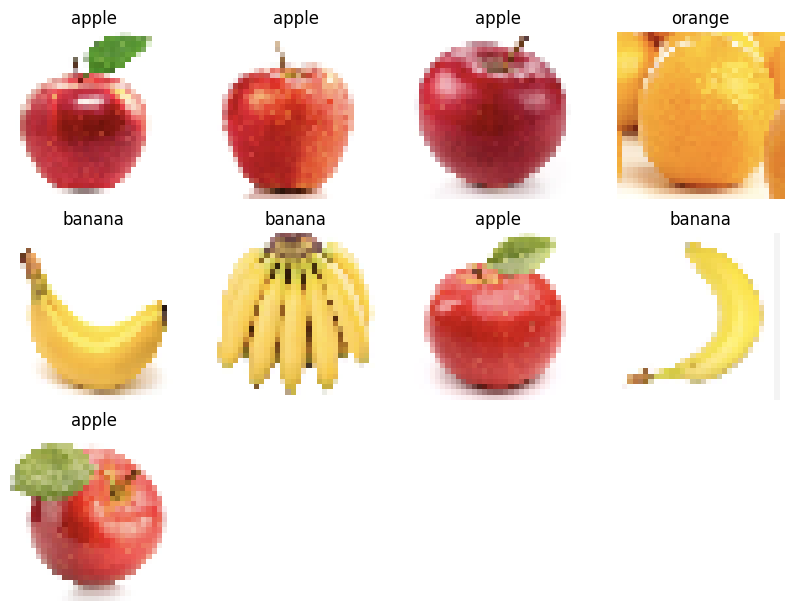

In [259]:
class_names = ["apple", "banana", "orange", "strawberry"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [315]:

# model = tf.keras.Sequential(
#     [
#      tf.keras.layers.Rescaling(1./255),
#      tf.keras.layers.Conv2D(32, 3, activation="relu"),
#      tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Conv2D(32, 3, activation="relu"),
#      tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Conv2D(32, 3, activation="relu"),
#      tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Flatten(),
#      tf.keras.layers.Dense(128, activation="relu"),
#      tf.keras.layers.Dense(4)
#     ]
# )

from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Block 1
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Block 2
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Block 3
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Flatten and Dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')  # Softmax for probability output
])


Define the optimizer and loss function

In [316]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Train the model

In [317]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 32
)

Epoch 1/32
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 253ms/step - accuracy: 0.4296 - loss: 2.0557 - val_accuracy: 0.1897 - val_loss: 1.5171
Epoch 2/32
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8197 - loss: 0.5996 - val_accuracy: 0.3362 - val_loss: 1.7506
Epoch 3/32
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8346 - loss: 0.4203 - val_accuracy: 0.1983 - val_loss: 1.9480
Epoch 4/32
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9034 - loss: 0.2847 - val_accuracy: 0.1983 - val_loss: 2.1428
Epoch 5/32
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.9002 - loss: 0.2598 - val_accuracy: 0.1983 - val_loss: 2.5028
Epoch 6/32
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.9377 - loss: 0.1902 - val_accuracy: 0.1983 - val_loss: 2.7487
Epoch 7/32
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9730 - loss: 0.1499 - val_accuracy: 0.1983 - val_loss: 2.7131
Epoch 8/32
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9546 - loss: 0.1421 - val_accuracy: 0.2759

Test the model

In [318]:
model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.9891 - loss: 0.0432


[0.06624359637498856, 0.97826087474823]

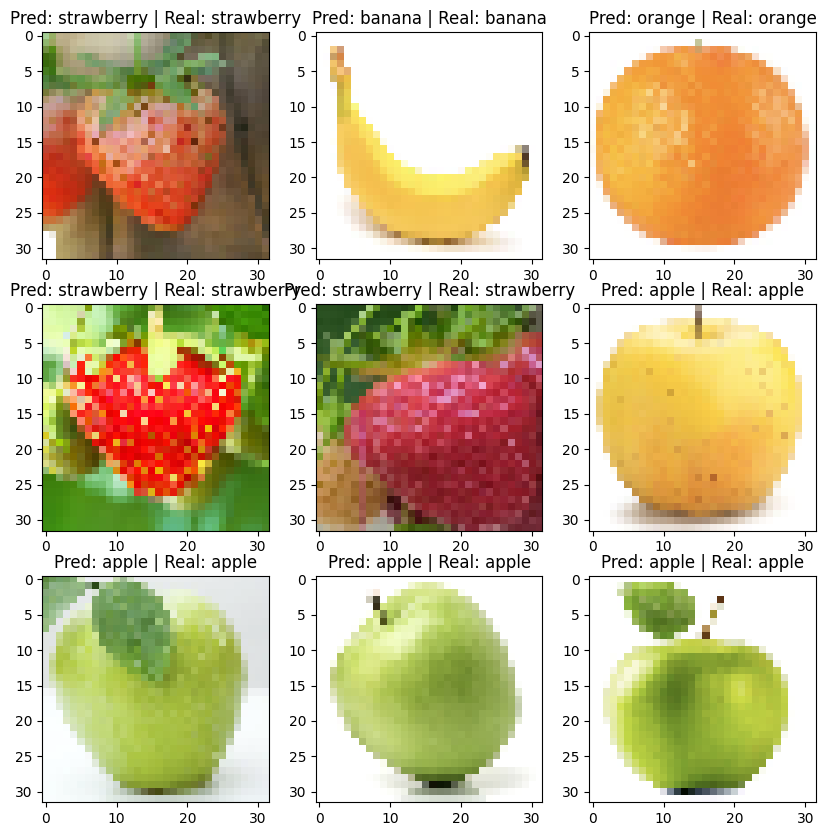

In [319]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [321]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# with open("model.tflite", 'wb') as f:
#   f.write(tflite_model)

model.save("fruit_model.keras")